## Load Packages and Trained Model from Save File

In [1]:
import pandas as pd
import numpy as np
from numpy import random 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import cv2

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score

# tensorflow & keras
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Activation, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator

# additional packages for working with directories
from PIL import Image
import os, os.path

In [2]:
# check version and ensure gpu is detected
print(f"TensorFlow Version: {tf.version.VERSION}")
print(f"GPU Check: {tf.config.list_physical_devices('GPU')}")

TensorFlow Version: 2.8.0
GPU Check: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
model = tf.keras.models.load_model('final_model.keras')

# Import Object Detection Packages

In [39]:
# specify the classifications
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'delete', 'space']

In [79]:
test_img_path = './data_my_images/2022-02-16 13_37_10-Camera.png'

In [80]:
test_img = tf.keras.preprocessing.image.load_img(test_img_path, target_size=(64,64))

input_arr = tf.keras.preprocessing.image.img_to_array(test_img)
input_arr = np.array([input_arr])
input_arr = input_arr.astype('float32')/255.

In [81]:
predictions = model.predict(input_arr)
predicted_class = np.argmax(predictions, axis=-1)
#predicted_class_name = classes[predicted_class[0]]
predicted_class

array([17], dtype=int64)

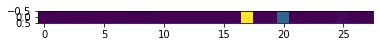

In [82]:
plt.imshow(model.predict(input_arr))

# Real Time Object Detection with Webcam

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break


In [4]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FPS, 10)
fps = int(cap.get(5))
print("fps:", fps)

while(cap.isOpened()):
    ret,frame = cap.read()
    image_np = np.array(frame)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

    num_detections = int(detections)



    detections = detect_fn(input_tensor)
    if not ret:
        break

    cv2.imshow('frame', frame)

    k = cv2.waitKey(1)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows() 



fps: 10


In [7]:
# create bounding box for gesture input

In [8]:
# stream bounding box images as model input

In [9]:
# apply model estimation and confidence to bounding box